In [ ]:
!pip install jupyter cython matplotlib

In [9]:
import time
import subprocess

# Función para ejecutar un archivo Cython y medir el tiempo de ejecución
def run_cython(file_path):
    start_time = time.time()
    subprocess.run(["cython", file_path])
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Función para ejecutar un archivo Python y medir el tiempo de ejecución
def run_python(file_path):
    start_time = time.time()
    subprocess.run(["python", file_path])
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

In [10]:
# Rutas de los archivos
python_file = "C:\\Users\\HP OMEN\\Downloads\\Unit2HPC\\Python_GoL.py"
cython_files = [
    "C:\\Users\\HP OMEN\\Downloads\\Unit2HPC\\cython1_gol.c",
    "C:\\Users\\HP OMEN\\Downloads\\Unit2HPC\\cython2_gol.c",
    "C:\\Users\\HP OMEN\\Downloads\\Unit2HPC\\cython3_gol.c",
    "C:\\Users\\HP OMEN\\Downloads\\Unit2HPC\\cython4_gol.c"
]

# Ejecutar y medir el tiempo de ejecución de cada archivo
python_execution_time = run_python(python_file)
cython_execution_times = [run_cython(file) for file in cython_files]

print("Tiempo de ejecución de Python_GoL.py:", python_execution_time)
print("Tiempos de ejecución de los archivos Cython:", cython_execution_times)

Tiempo de ejecución de Python_GoL.py: 0.08126521110534668
Tiempos de ejecución de los archivos Cython: [0.7992167472839355, 0.908245325088501, 0.7398333549499512, 0.7276835441589355]


In [17]:
import timeit
import numpy as np

In [23]:
def update(lattice):
    box_length = len(lattice) - 2
    lattice_new = [[0 for _ in range(box_length + 2)] for _ in range(box_length + 2)]
    
    for i in range(1, box_length + 1):
        for j in range(1, box_length + 1):
            lattice_new[i][j] = update_rule(lattice, i, j)
    return lattice_new

def update_rule(lattice, i, j):
    n_neigh = lattice[i + 1][j] + lattice[i][j + 1] + lattice[i + 1][j + 1] + \
              lattice[i - 1][j] + lattice[i][j - 1] + lattice[i - 1][j - 1] + \
              lattice[i - 1][j + 1] + lattice[i + 1][j - 1]
    
    if (lattice[i][j] == 1) and (n_neigh in [2, 3]):
        return 1
    elif lattice[i][j] == 1:
        return 0
    elif (lattice[i][j] == 0) and (n_neigh == 3):
        return 1
    else:
        return 0

#mide el timepo de ejecucion cuando el box size es 300

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))


import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['python', timeit.timeit(main, number=1)])

16.023188900000605


In [24]:
from cython1_gol import update as update_cython1

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython1(lattice)
    return lattice


if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
#agregar el time en el archivo csv con el nombre de cython1

import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython1', timeit.timeit(main, number=1)])

12.468079999999645


In [25]:
from cython2_gol import update as update_cython2

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython2(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython2', timeit.timeit(main, number=1)])

5.920139900000322


In [27]:
from cython3_gol import update as update_cython3

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython3(lattice)
    return lattice
    
    
if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython3', timeit.timeit(main, number=1)])

4.745043100000657


In [28]:
from cython4_gol import update as update_cython4

def main():
    box_length = 300
    lattice = np.random.randint(2, size=(box_length + 2, box_length + 2))
    for _ in range(300):
        lattice = update_cython4(lattice)
    return lattice

if __name__ == '__main__':
    print(timeit.timeit(main, number=1))
    
    
import csv
with open('time.csv', mode='a') as file:
    writer = csv.writer(file)
    writer.writerow(['cython4', timeit.timeit(main, number=1)])

0.2917744999995193


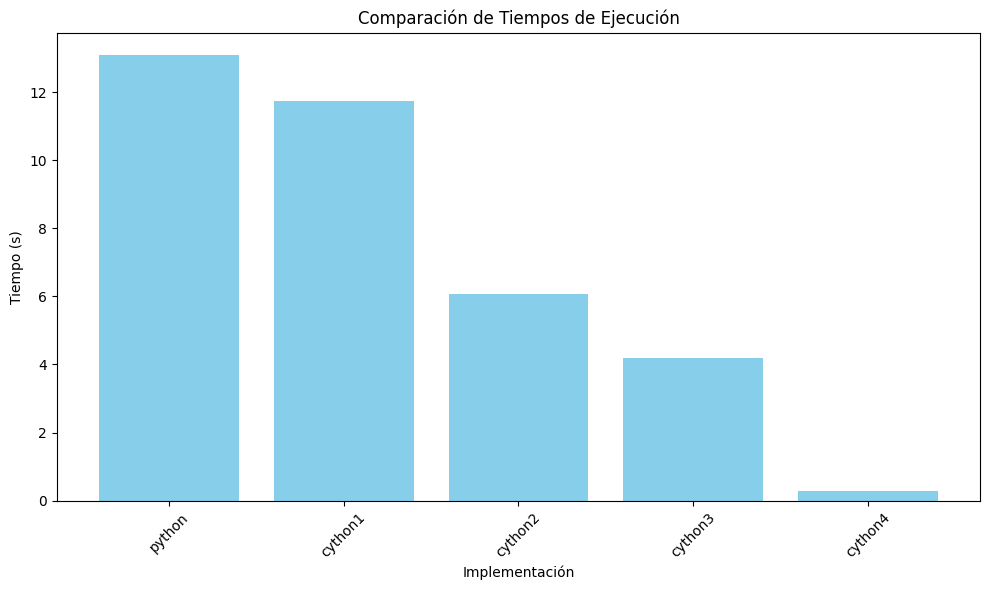

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('time.csv')

labels = data.iloc[:, 0].tolist()
labels.insert(0, 'python') 
times = data.iloc[:, 1].tolist()
times.insert(0, 13.096366302000206)  

# Creando la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, times, color='skyblue')
plt.title('Comparación de Tiempos de Ejecución')
plt.xlabel('Implementación')
plt.ylabel('Tiempo (s)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando la gráfica
plt.show()